In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from neuwork.neural_network import NN
from neuwork.layers import Dense

X :  [[ 101  118]
 [ 318  157]
 [ 179 -464]
 [ 285 -230]
 [-363  122]
 [ 155 -316]]
Y :  [[0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]]


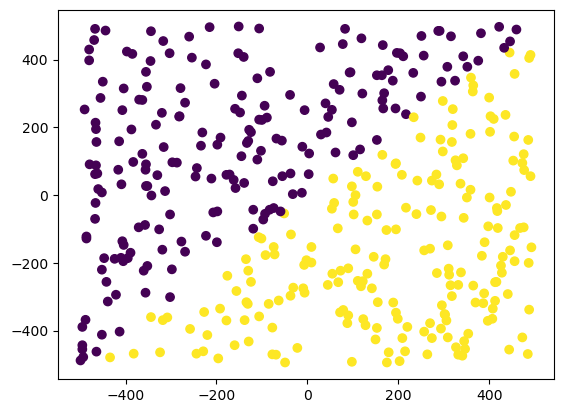

result
Y_test :  [[1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1.
  1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1.
  1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1.
  0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0.
  1. 0. 0. 1.]]
Y_predict :  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]
accuracy :  0.48


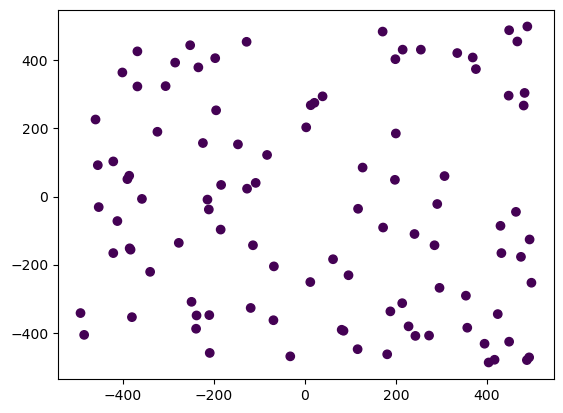

In [39]:
 l=500

 X = np.array(np.random.randint(-1*l,l,(l,2)),ndmin=2)
 print('X : ', X[:6 , :])
 Y = []
 for i in range(l) :
     if X[i,0] > X[i,1] :
         Y.append(1.0)
     else :
         Y.append(0)
 Y=np.array(Y, ndmin=2)
 Y=Y.T
 split = int(l*0.8)
 X_train = X[:split , :]
 Y_train = Y[:split , :]
 print('Y : ',Y_train[:6, :])

 X_test = X[split: , :]
 Y_test = Y[split: , :]

 plt.scatter(X_train[: , 0] , X_train[: , 1],c = Y_train[: , 0])
 plt.show()
'''
X_train =np.array([[2,3],
             [4,5],
             [6,1],
             [2,0]])
Y_train = np.array([[1],[1],[0],[0]])

X_test =np.array([[4,6],
             [8,5]])
Y_test = np.array([1,0])
'''


model = NN([
            Dense(units=1 , activation='sigmoid')
            ] 
            , loss = 'BinaryCrossentropy' )

model.fit(X_train, Y_train , epochs=10000 ,learning_rate=1,decay=0.06,momentum=0.4, print_cost=False)

 Y_predict = model.predict(X_test)
 Y_predict[Y_predict >= 0.5 ] = 1
 Y_predict[Y_predict < 0.5 ] = 0
 Y_predict
 print('result')
(Y_test == Y_predict).all()
 print('Y_test : ',Y_test.T)
 print('Y_predict : ',Y_predict.T)
 l1 = Y_test.shape[0]
 incorrect = 0 
 for i in range(l1) :
     if (Y_predict[i,0] != Y_test[i,0]) :
         incorrect +=1

 accuracy = (l1 - incorrect) / l1 
 print('accuracy : ' , accuracy)

 plt.scatter(X_test[:,0],X_test[:,1],c=Y_predict)


In [38]:
layer1 = model.layers[0]
layer1.inputs

array([[-470, -446],
       [-403,  331],
       [ 293,  168],
       [ 367, -371],
       [-389, -470],
       [ 389, -103],
       [-455, -344],
       [-146,  -90],
       [ 358, -351],
       [  11,  267],
       [-125, -139],
       [ 177,  496],
       [ 286,  438],
       [ 263, -314],
       [ 402,  -58],
       [-113,  338],
       [ 441, -191],
       [-349,  -81],
       [  47,  291],
       [  97,   29],
       [ -93,  455],
       [ 250, -421],
       [ 194, -205],
       [-421,  103],
       [ 496, -243],
       [ 427,  349],
       [ 170, -240],
       [ 195, -235],
       [ -93,  194],
       [ 257, -497],
       [ 301,  299],
       [ 482,  -37],
       [-296,   87],
       [ 253,  -49],
       [ 460,  -87],
       [  -8,  282],
       [ 412,  382],
       [ 142,  273],
       [ 350, -183],
       [ -12,  173],
       [ 232,  404],
       [  71,   57],
       [  62, -122],
       [ 159, -332],
       [ 148,  372],
       [-412,  264],
       [-114,  306],
       [ 208,

In [11]:
layer1.outputs

array([[0.49084196],
       [0.48402426],
       [0.49121933],
       [0.49785181]])

In [12]:
layer1.g.activate(layer1.inputs @ layer1.W + layer1.b)

array([[0.49084196],
       [0.48402426],
       [0.49121933],
       [0.49785181]])

In [14]:
grad = layer1.g.get_g_grad(layer1.outputs)
grad

array([[0.24991613],
       [0.24974478],
       [0.2499229 ],
       [0.24999539]])

In [16]:
model.J.compute_cost(layer1.outputs, Y_train)

array([-0.48168186, -0.46803763, -0.48243685, -0.49570359])

In [11]:
X = np.array((1,0,-3,4,5,6,-7,8,9,0,-6,5,-23,12,45,-6576,-23,7,76,6,54,-34,23,-23),ndmin=2)
X = np.resize(X, (6,4))
X

array([[    1,     0,    -3,     4],
       [    5,     6,    -7,     8],
       [    9,     0,    -6,     5],
       [  -23,    12,    45, -6576],
       [  -23,     7,    76,     6],
       [   54,   -34,    23,   -23]])

In [13]:
func = lambda x : max(0,x)
f = np.vectorize(func)
X_new = f(X)
X_new

array([[ 1,  0,  0,  4,  5],
       [ 6,  0,  8,  9,  0],
       [ 0,  5,  0, 12, 45],
       [ 0, 34,  0,  7, 76],
       [ 6, 54,  0, 23,  0]])

In [4]:
relu_diff = lambda x : 1 if x>0 else 0
relu_diff = np.vectorize(relu_diff)
relu_diff(X)

array([[1, 0, 0, 1, 1],
       [1, 0, 1, 1, 0],
       [0, 1, 0, 1, 1],
       [0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0]])

In [12]:
g_z = X
s = np.array(np.sum(g_z,axis=1),ndmin=2)
print(s)
print('\n')
g_z = g_z/s.T
g_z

[[    2    12     8 -6542    66    20]]




array([[ 5.00000000e-01,  0.00000000e+00, -1.50000000e+00,
         2.00000000e+00],
       [ 4.16666667e-01,  5.00000000e-01, -5.83333333e-01,
         6.66666667e-01],
       [ 1.12500000e+00,  0.00000000e+00, -7.50000000e-01,
         6.25000000e-01],
       [ 3.51574442e-03, -1.83430144e-03, -6.87863039e-03,
         1.00519719e+00],
       [-3.48484848e-01,  1.06060606e-01,  1.15151515e+00,
         9.09090909e-02],
       [ 2.70000000e+00, -1.70000000e+00,  1.15000000e+00,
        -1.15000000e+00]])